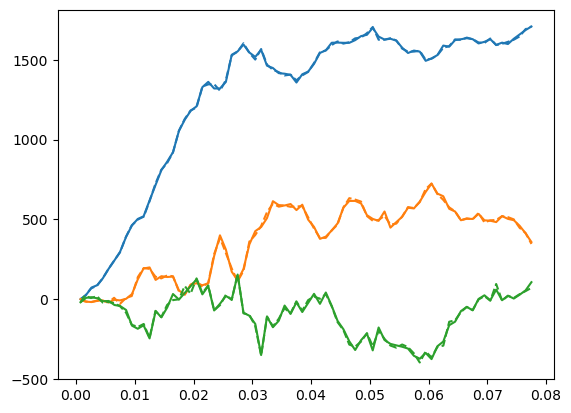

In [1]:
from pathlib import Path
import numpy as np
from matplotlib import pyplot as plt

from benchmark import get_measurement_fn
from lsstypes import read

kw = dict(tracer='LRG', zrange=(0.8, 1.1), region='NGC')
spectrum_py = read(get_measurement_fn(kind='mesh2_spectrum_poles_pypower', **kw))
spectrum_jax = read(get_measurement_fn(kind='mesh2_spectrum_poles', **kw))

ax = plt.gca()
for ill, ell in enumerate(spectrum_jax.ells):
    color = 'C{:d}'.format(ill)
    pole = spectrum_py.get(ell)
    ax.plot(pole.coords('k'), pole.coords('k') * pole.value().real, color=color, linestyle='-')
    pole = spectrum_jax.get(ell)
    ax.plot(pole.coords('k'), pole.coords('k') * pole.value().real, color=color, linestyle='--')
plt.show()

On top of each other, all good!

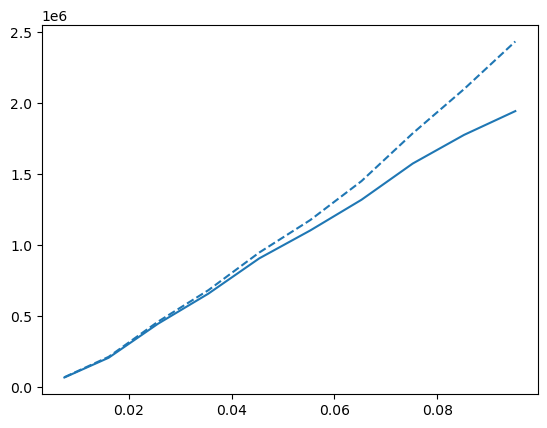

In [12]:
spectrum_trium = read(get_measurement_fn(kind='mesh3_spectrum_poles_sugiyama-diagonal_triumvirate', **kw))
spectrum_jax = read(get_measurement_fn(kind='mesh3_spectrum_poles_sugiyama-diagonal', **kw))

ax = plt.gca()
for ill, ell in enumerate(spectrum_jax.ells):
    color = 'C{:d}'.format(ill)
    pole = spectrum_trium.get(ell)
    x = pole.coords('k')[..., 0]
    ax.plot(x, x**2 * pole.value().real, color=color, linestyle='-')
    pole = spectrum_jax.get(ell)
    x = pole.coords('k')[..., 0]
    ax.plot(x, x**2 * pole.value().real, color=color, linestyle='--')
plt.show()